In [ ]:
https://learnpython.com/blog/sort-tuples-in-python/

In [35]:
import numpy as np 
import matplotlib.pyplot as plt


In [36]:
#create 2d data 
a = np.array([[2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1], 
              [2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9]])

print('array shape:', a.shape)
x_values = a[0, :] #first row and all columns 
y_values = a[1, :] #second row and all columns 

print('x_valyes', x_values)
print('y_valyes', y_values)

array shape: (2, 10)
x_valyes [2.5 0.5 2.2 1.9 3.1 2.3 2.  1.  1.5 1.1]
y_valyes [2.4 0.7 2.9 2.2 3.  2.7 1.6 1.1 1.6 0.9]


# Step 1: Standardize the data

In [38]:
#compute the mean 

#the mean of the x values of all the data points 
mean_across_rows = np.mean(a, axis= 1)
x_mean = mean_across_rows[0]
#the mean of the y values of all the data points 
y_mean = mean_across_rows[1]

print('all means:', mean_across_rows)
print('x_mean', x_mean)
print('y_mean',y_mean)

all means: [1.81 1.91]
x_mean 1.81
y_mean 1.9100000000000001


In [39]:
adjusted_x_values = x_values - x_mean
print('adjusted x_values:', adjusted_x_values)


adjusted_y_values = y_values - y_mean
print('adjusted y_values:', adjusted_y_values)

adjusted x_values: [ 0.69 -1.31  0.39  0.09  1.29  0.49  0.19 -0.81 -0.31 -0.71]
adjusted y_values: [ 0.49 -1.21  0.99  0.29  1.09  0.79 -0.31 -0.81 -0.31 -1.01]


In [40]:
adjusted_a = np.empty((2, 10))
adjusted_a[0, :] = adjusted_x_values
adjusted_a[1, :] = adjusted_y_values
print('adjusted_a (matrix after subtracting the mean): \n', adjusted_a)

adjusted_a (matrix after subtracting the mean): 
 [[ 0.69 -1.31  0.39  0.09  1.29  0.49  0.19 -0.81 -0.31 -0.71]
 [ 0.49 -1.21  0.99  0.29  1.09  0.79 -0.31 -0.81 -0.31 -1.01]]


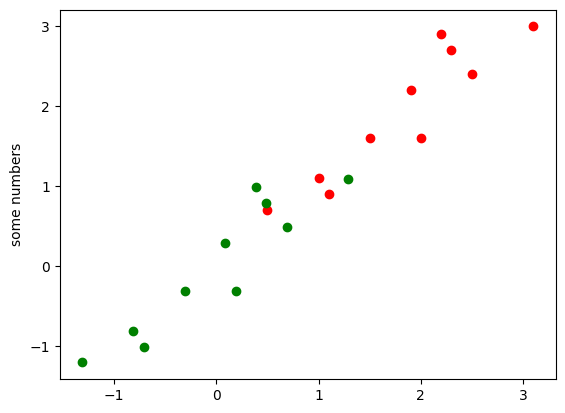

In [59]:
#print orginal and adjusted values 
#plt.plot([1, 2, 3, 4])
#plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')

#a = np.array([[2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1], 
#              [2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9]])
#a = np.array([[2.5, 0.5], 
#              [2.4, 0.7]])
#plt.plot(a, 'ro')
plt.plot(x_values, y_values, 'ro')
plt.plot(adjusted_x_values, adjusted_y_values, 'go')
plt.ylabel('some numbers')
plt.show()


# Step 2: Find the covariance matrix 

In [41]:
covariance = np.cov(adjusted_a)
print('covariance matrix:\n', covariance)


covariance matrix:
 [[0.61655556 0.61544444]
 [0.61544444 0.71655556]]


# Step 3: Find the eigenvectors and eigenvalues of the covariance matrix 


In [42]:
eigenvalues, eigenvectors = np.linalg.eig(covariance)
#eigen vectors are the lines that charectrise the data 
#eigen values are the ranks to these vectors, the higher the eigen value the more important the eigen vector 
#the eigen vector with the highest eigen value is the principal compinent of the dataset 
print('eigenvalues:\n',eigenvalues) #1.28 means that the second vector is more important because it has a higher eigen value 
print('eigenvectors:\n',eigenvectors)

eigenvalues:
 [0.0490834  1.28402771]
eigenvectors:
 [[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]


# Step 4: Rearrange the eigenvectors and eigenvalues

In [78]:
# We first make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [] #eigen_pairs 
for i in range(len(eigenvalues)):
        eigen_pairs.append((eigenvalues[i], eigenvectors[:, i])) #take the first col and all the rows
print('feature vector BEFORE arrangment:\n', eigen_pairs)

#arrange from highest to lowest 
#feature_vector = sorted(eigen_pairs, key=lambda tup: tup[0], reverse=True)

feature_vector = sorted(eigen_pairs,key=lambda a: a[0], reverse=True)#descending order 
print('feature vector AFTER arrangment:\n', feature_vector)

eig_vals_sorted = np.array([x[0] for x in feature_vector])
eig_vecs_sorted = np.array([x[1] for x in feature_vector])


feature vector BEFORE arrangment:
 [(0.04908339893832736, array([-0.73517866,  0.6778734 ])), (1.2840277121727839, array([-0.6778734 , -0.73517866]))]
feature vector AFTER arrangment:
 [(1.2840277121727839, array([-0.6778734 , -0.73517866])), (0.04908339893832736, array([-0.73517866,  0.6778734 ]))]


# Step 5: Choose principal components


In [89]:
#transform the data so it can be expressed in terms of the eigenvectors 
# Select top k eigenvectors (MANUALLY)
final_x_data = eig_vecs_sorted[0].dot(adjusted_a)
print(final_x_data)

final_y_data = eig_vecs_sorted[1].dot(adjusted_a)
print(final_y_data)



[-0.82797019  1.77758033 -0.99219749 -0.27421042 -1.67580142 -0.9129491
  0.09910944  1.14457216  0.43804614  1.22382056]
[-0.17511531  0.14285723  0.38437499  0.13041721 -0.20949846  0.17528244
 -0.3498247   0.04641726  0.01776463 -0.16267529]


In [105]:
final_data = eig_vecs_sorted.dot(adjusted_a)
print(final_data)

[[-0.82797019  1.77758033 -0.99219749 -0.27421042 -1.67580142 -0.9129491
   0.09910944  1.14457216  0.43804614  1.22382056]
 [-0.17511531  0.14285723  0.38437499  0.13041721 -0.20949846  0.17528244
  -0.3498247   0.04641726  0.01776463 -0.16267529]]


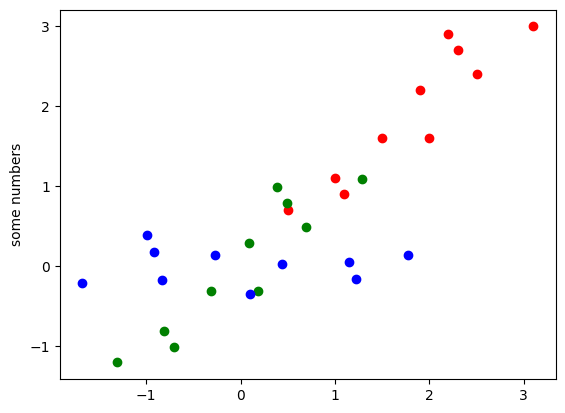

In [104]:
plt.plot(x_values, y_values, 'ro')
plt.plot(adjusted_x_values, adjusted_y_values, 'go')
plt.plot(final_x_data, final_y_data, 'bo')
plt.ylabel('some numbers')
plt.show()


In [103]:
# Select top k eigenvectors (AUTOMATICALLY)
k= 2 

for i in range(k):
    final_data = eig_vecs_sorted[i].dot(adjusted_a) #eig_vecs_sorted is the same as row feature vector in the pca tutorial by Lindsay Smith ,page 19
    print('PCA 0 is the most important vector')
    print('PCA', i)
    print(final_data)


PCA 0 is the most important vector
PCA 0
[-0.82797019  1.77758033 -0.99219749 -0.27421042 -1.67580142 -0.9129491
  0.09910944  1.14457216  0.43804614  1.22382056]
PCA 0 is the most important vector
PCA 1
[-0.17511531  0.14285723  0.38437499  0.13041721 -0.20949846  0.17528244
 -0.3498247   0.04641726  0.01776463 -0.16267529]


# Step 6: Getting the old data back 

In [109]:
final_data = eig_vecs_sorted.dot(adjusted_a)


original_data = eig_vecs_sorted.dot(final_data)
original_data[0, :]  = original_data[0, :] + x_mean
original_data[1, :]  = original_data[1, :] + y_mean

print(original_data)



[[2.5 0.5 2.2 1.9 3.1 2.3 2.  1.  1.5 1.1]
 [2.4 0.7 2.9 2.2 3.  2.7 1.6 1.1 1.6 0.9]]
